<a href="https://colab.research.google.com/github/shivanisharma543-ux/clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
      -K-Means Clustering:
          -K-Means is a partition-based clustering algorithm.
          -That divides data into K predefined cluster, by minimizing the distance between data points and their assigned cluster centroid.
          -Key characteristics:
                -Requires number of clusters (K) to be specified beforehand
                -Uses centroids (mean of points)
                -Works best with numerical data
                -Fast and scalable for large datasets
                -Sensitive to initialization and outliers
          -Use Case:
                -Customer Segmentation in Marketing: A retail company groups customers based on:
                    -Purchase amount
                    -Frequency
                    -Age / income
                -Helps in targeted promotions and personalized offers.

      -Hierarchical Clustering:
          -Hierarchical clustering builds a tree-like structure (dendrogram) showing how clusters are merged or split.
          -Key Characteristics:
                -No need to predefine number of clusters
                -Two types:
                    -Agglomerative (bottom-up)
                    -Divisive (top-down)
                -Works well for small to medium datasets
                -More interpretable but computationally expensive
          -Use Case:
                -Document or Gene Clustering:
                -Used in bioinformatics to group genes based on expression similarity
                -Helps identify relationships between genes or diseases
| Feature        | K-Means               | Hierarchical         |
| -------------- | --------------------- | -------------------- |
| Cluster number | Must be predefined    | Not required         |
| Speed          | Fast                  | Slower               |
| Scalability    | High                  | Low–Medium           |
| Output         | Flat clusters         | Tree (dendrogram)    |
| Best for       | Large datasets        | Exploratory analysis |
| Sensitivity    | Sensitive to outliers | Less sensitive       |
'''



In [ ]:
'''
2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
        -The Silhouette Score is used to evaluate how well data points are clustered in a clustering algorithm.
        -It does so by measuring cluster cohesion and separation.
        -Purpose of Silhouette Score:
            -The Silhouette Score helps to answer two key questions:
                -How similar is a data point to its own cluster?
                -How different is it from other clusters?
            -It tells us how well the clustering has been performed, without using any labeled data.
        -How It Works:
            -For each data point:
                -a = mean distance to other points in the same cluster → measures cohesion
                -b = mean distance to points in the nearest neighboring cluster → measures separation
                -Silhouette Score(s) = (b - a) / max(a, b)
| Score Value | Meaning                               |
| ----------- | ------------------------------------- |
| +1          | Excellent clustering (well separated) |
| 0           | Overlapping clusters                  |
| < 0         | Poor clustering (wrong assignment)    |
'''



In [ ]:
'''
3.  What are the core parameters of DBSCAN, and how do they influence the clustering process?
        -DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
        -It is a density-based clustering algorithm that groups points based on how densely they are packed together.
        -Core Parameters of DBSCAN:
        1. ε (Epsilon) – Neighborhood Radius
            -The maximum distance between two points for them to be considered neighbors.
            -Influence:
                  -Small ε → many points labeled as noise
                  -Large ε → clusters may merge incorrectly
            -Effect: Controls cluster size and shape
        2. MinPts – Minimum Number of Points
            -The minimum number of points required within ε distance to form a dense region.
            -Influence:
                  -Low MinPts → noise becomes clusters
                  -High MinPts → fewer clusters, more noise
            -Typical value:
                  -≥ dimensions + 1
                  -Often 4 or more
        3. Distance Metric (optional but important)
            -Metric used to calculate distance between points.
            -Common choices:Euclidean (most common), Manhattan, Cosine (for text data)
            -Influence:Affects shape and density of clusters.
'''

In [ ]:
'''
4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
      -Feature scaling is crucial in clustering algorithms like K-Means and DBSCAN because
      -these algorithms rely heavily on distance calculations.
      -If features are on different scales, the results become biased and misleading.
      -Feature scaling ensures that all features contribute equally to the clustering process.
      -Why Feature Scaling Matters:
        1.Distance-Based Algorithms Are Scale-Sensitive
          -Both K-Means and DBSCAN use distance metrics (usually Euclidean distance).
          -If one feature has a larger range than others:
             -It dominates the distance calculation
             -Smaller-scale features become irrelevant
        2.Improves Cluster Accuracy
          -Without scaling: Clusters may form based on only one feature, True structure of data is lost
          -With scaling:All features contribute equally, Clusters are more meaningful
        3.Essential for DBSCAN Density Calculation.
          -DBSCAN depends on: ε (epsilon) → distance threshold, Density estimation
          -If features aren’t scaled:ε becomes meaningless, Noise and cluster detection become inaccurate
        4.Helps Algorithm Converge Properly (K-Means)
          -K-Means minimizes sum of squared distances
          -Unscaled features distort centroid movement
          -Slower or incorrect convergence
'''

In [ ]:
'''
5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
      -The Elbow Method is a heuristic technique used in K-Means clustering
      -To determine the optimal number of clusters (K) by analyzing how the clustering performance changes as K increases.
      -What the Elbow Method Does:
          -It evaluates how the Within-Cluster Sum of Squares (WCSS) changes with different values of K.
          -WCSS (Inertia):It measures the sum of squared distances between each point and its assigned cluster centroid.
      -How the Elbow Method Works:
          -Run K-Means for different values of K (e.g., 1 to 10)
          -Compute WCSS for each K
          -Plot:X-axis → Number of clusters (K), Y-axis → WCSS
          -Observe the graph
      -The “Elbow” Point
          -Initially, WCSS decreases rapidly
          -After a certain K, the decrease becomes slow and marginal
          -The point where the curve bends like an elbow is the optimal K
          -This point represents a balance between:
            Too few clusters (underfitting)
            Too many clusters (overfitting)
'''

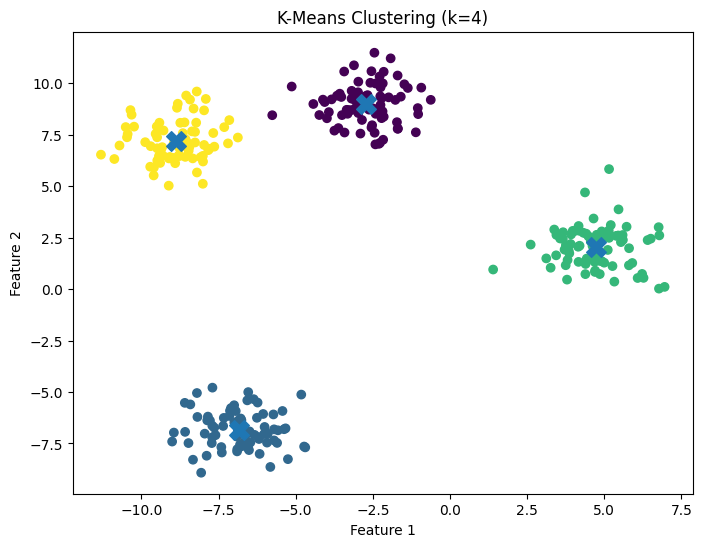

In [1]:
#6.Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Step 3: Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
#7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load dataset
wine = load_wine()
X = wine.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan.fit(X_scaled)

# Get labels
labels = dbscan.labels_

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)



Number of clusters found (excluding noise): 1


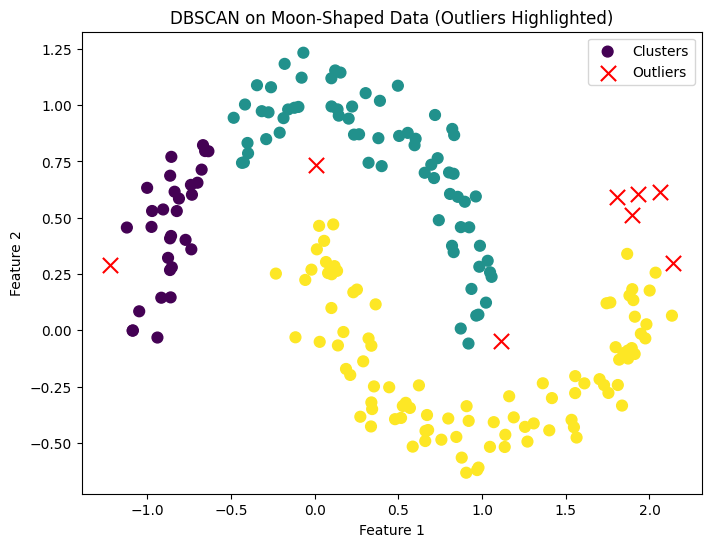

In [5]:
#8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.18, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify clusters and outliers
outliers = labels == -1
clusters = labels != -1

# Plot the results
plt.figure(figsize=(8, 6))

# Clustered points
plt.scatter(X[clusters, 0],X[clusters, 1],c=labels[clusters],cmap="viridis",s=60,label="Clusters")

# Outliers
plt.scatter(X[outliers, 0],X[outliers, 1],color="red",marker="x",s=120,label="Outliers")

plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



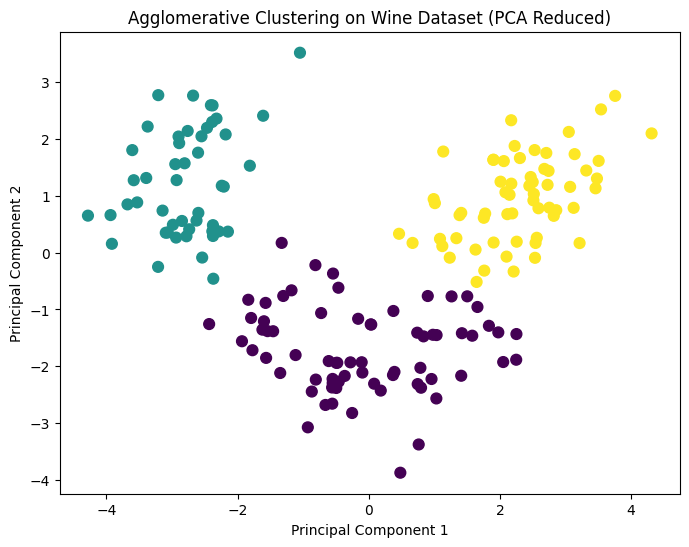

In [6]:
#9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=60)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
'''
10.You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

1. Choice of Clustering Algorithm:
    -Primary Choice: K-Means
        -Scales well for large customer datasets
        -Easy to interpret for business users
        -Works well with numerical behavioral data
        -Widely used in marketing segmentation
    -Alternative / Supporting Algorithms:
| Algorithm                         | When to Use                          |
| --------------------------------- | ------------------------------------ |
| DBSCAN                            | To detect outliers or unusual buyers |
| Hierarchical Clustering           | For small datasets & visual analysis |
| Gaussian Mixture Models (GMM)     | If clusters overlap
    -Final choice:K-Means for main segmentation + DBSCAN for outlier detection                |
2. Data Preprocessing Steps:
    -Handling missing values:
        -Numerical features → Mean / Median imputation
        -Categorical features → Mode or “Unknown”
        -Drop rows only if missing data is minimal
    -Feature Engineering
        -Examples:
          Total spend
          Average order value
          Purchase frequency
          Recency (days since last purchase)
          Category-wise spending
    -Feature Scaling
         -Use StandardScaler or MinMaxScaler
          Distance-based algorithms (K-Means, DBSCAN)
          Prevent high-value features from dominating
3.Choosing the Optimal Number of Clusters:
    -Methods Used:
    (a) Elbow Method: Plot WCSS vs K, Choose the “elbow point”
    (b) Silhouette Score: Measures cohesion & separation, Higher score = better clustering
    (c) Business Validation:Clusters must be:Interpretable, Actionable & Meaningful for marketing.
4.How Marketing Team Benefits:
  (a) Personalized Campaigns
| Cluster              | Marketing Action                |
| -------------------- | ------------------------------- |
| High-value customers | Loyalty rewards, premium offers |
| Price-sensitive      | Discounts, flash sales          |
| Infrequent buyers    | Re-engagement emails            |
| New customers        | Onboarding offers               |
(b)Improved ROI:
    -Targeted ads instead of mass campaigns
    -Better conversion rates
    -Reduced marketing cost
(c)Customer Lifetime Value (CLV) Prediction
    -Identify high-CLV segments
    -Focus retention strategies
'''